<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Задачи

# Загрузите датасет transaction_data.csv.
# Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

# Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню?
# Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

# Сколько транзакций завершились ошибкой?
# Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

# Коллега прислал Вам обновленные данные.
# Постройте сводную таблицу user_vs_minute_pivot,
# где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций
# в указанную минуту.
# Пропущенные значения заполните нулями.

# Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня.
# Результат сохраните в колонку true_minute.
# Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).



# Описание данных

# date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
# name – имя пользователя
# transaction – статус транзакции
# minute* – сколько минут прошло с начала дня

In [3]:
data = pd.read_csv('transaction_data.csv')
data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
data.shape

(5315, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [6]:
data.dtypes

date           object
name           object
transaction    object
dtype: object

In [7]:
data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [8]:
# Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню?
# Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [9]:
# Количество транзакций
data.value_counts('transaction')

transaction
successfull    3692
cancelled      1619
error             4
dtype: int64

In [10]:
# Проценты транзакций
transaction_per = data.value_counts('transaction',normalize=True)*100
transaction_per

transaction
successfull    69.463782
cancelled      30.460960
error           0.075259
dtype: float64

In [11]:
transaction_barplot = data.groupby('transaction', as_index=False)\
                            .agg({'name' :'count'})\
                            .rename(columns={'name' : 'count_transaction'})\
                            .sort_values('count_transaction', ascending=False)

transaction_barplot

,transaction,count_transaction
2,successfull,3692
0,cancelled,1619
1,error,4


<AxesSubplot:xlabel='transaction', ylabel='count_transaction'>

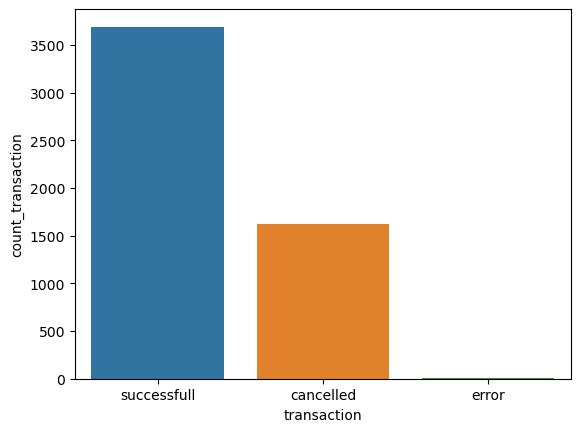

In [12]:
sns.barplot(data=transaction_barplot,x='transaction', y='count_transaction')

In [13]:
# transaction_countplot = sns.countplot(data.transaction, order=['successfull','cancelled','error'])
# order = порядок значений на графике

In [14]:
# Сколько транзакций завершились ошибкой?
# Сколько успешных транзакций осуществил каждый из пользователей?

data.value_counts('transaction')

transaction
successfull    3692
cancelled      1619
error             4
dtype: int64

In [15]:
# Постройте гистограмму распределения числа успешных транзакций.
# Осуществлёнными считаются транзакции со значением successfull

In [16]:
# Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций,
#совершённых каждым пользователем, где

# по оси x – число транзакций
# по оси y – доля пользователей с таким числом транзакций

In [17]:
successfull_transaction = data.query('transaction == "successfull"')

successfull_transaction = successfull_transaction.groupby('name',as_index=False)\
                        .agg({'transaction' : 'count'})

successfull_transaction.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [18]:
successfull_transaction.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


<AxesSubplot:xlabel='transaction', ylabel='Count'>

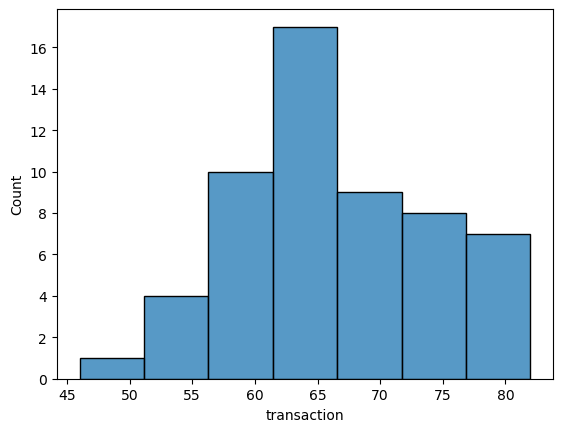

In [19]:
sns.histplot(successfull_transaction.transaction)

Пользователи в среднем совершили примерно по 66 транзакций\
Максимальное число транзакций – 82\
Примерно 25% пользователей совершили менее 61 транзакции

In [20]:
# К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

# столбцы – имена пользователей
# строки – минута времени осуществления операции (minute)
# значения – число совершённых операций
# Пропущенные значения заполните нулями.

# Note: фильтровать успешные транзакции не нужно - постройте табличку по всем.

# Новые данные сохранены в df.

In [21]:
df = pd.read_csv('transaction_data_updated.csv')
#df.isna().sum()
df.fillna(0)
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


<AxesSubplot:xlabel='minute', ylabel='transaction'>

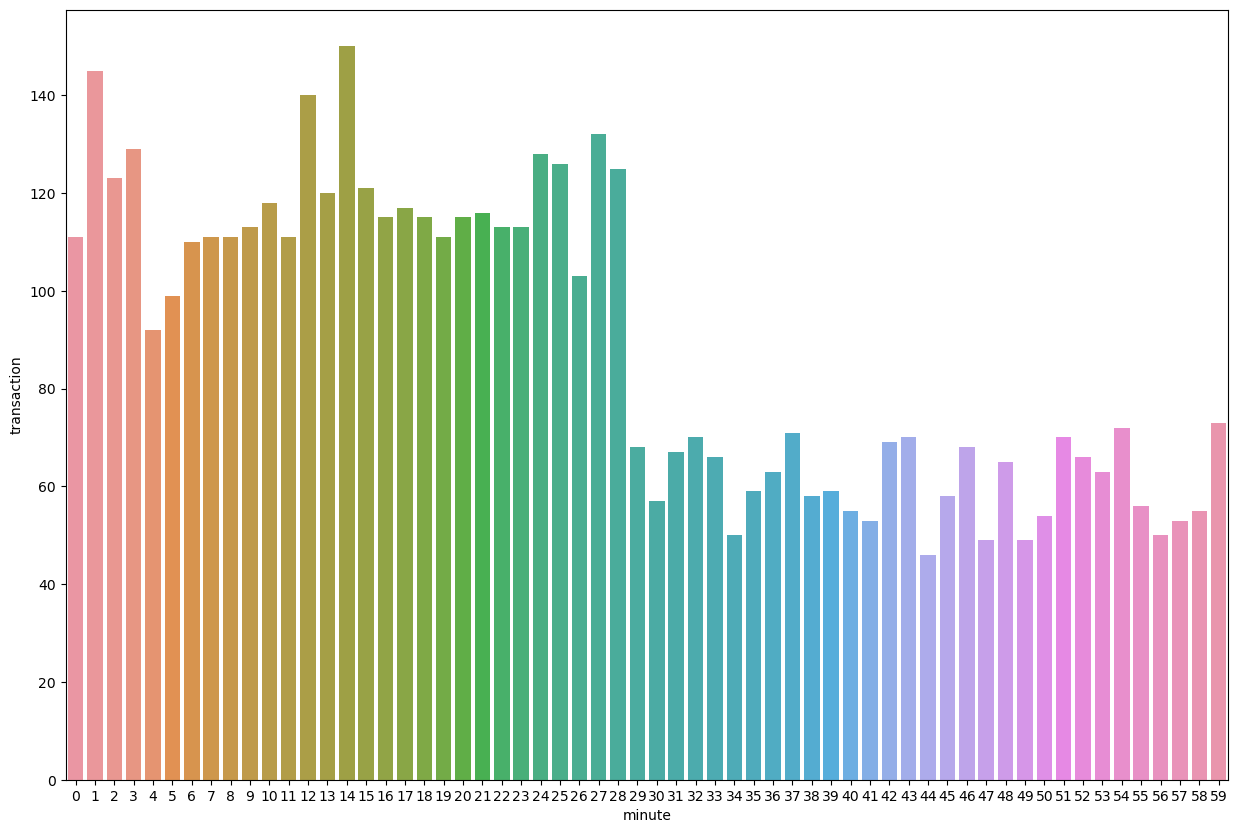

In [22]:
user_vs_minute_pivot = df.groupby('minute', as_index=False)\
                        .agg({'transaction' : 'count'})\

plt.figure(figsize=(15,10))
sns.barplot(data=user_vs_minute_pivot,x='minute', y='transaction')

In [23]:
user_vs_minute_pivot = df.groupby(['name', 'minute'], as_index=False)\
                        .agg({'transaction' : 'count'})\
                        .pivot(index='minute',columns='name',values='transaction')\
                        .fillna(0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [24]:
# Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня.
# Результат сохраните в колонку true_minute.
# Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

# Например:
# date                name               transaction  minute  true_minute
# 2020-03-02 00:37:20 Ekaterina_Petrova  cancelled    37      37
# 2020-03-02 01:06:14 Ekaterina_Smirnova successfull  6       66

        
# Данные записаны в df , колонка date прочитана как дата.

In [25]:
df.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [26]:
df

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [27]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df['hours'] = df['date'].dt.hour
df['true_minute'] = df['hours']*60 + df['minute']
df

#df['true_minute'] = df['date'].dt.hour*60 + df['minute']
#Альтернативный вариант

,date,name,transaction,minute,hours,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,0,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,0,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,1,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,0,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,0,17
...,...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,0,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,0,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,0,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,0,13


<AxesSubplot:xlabel='true_minute', ylabel='transaction'>

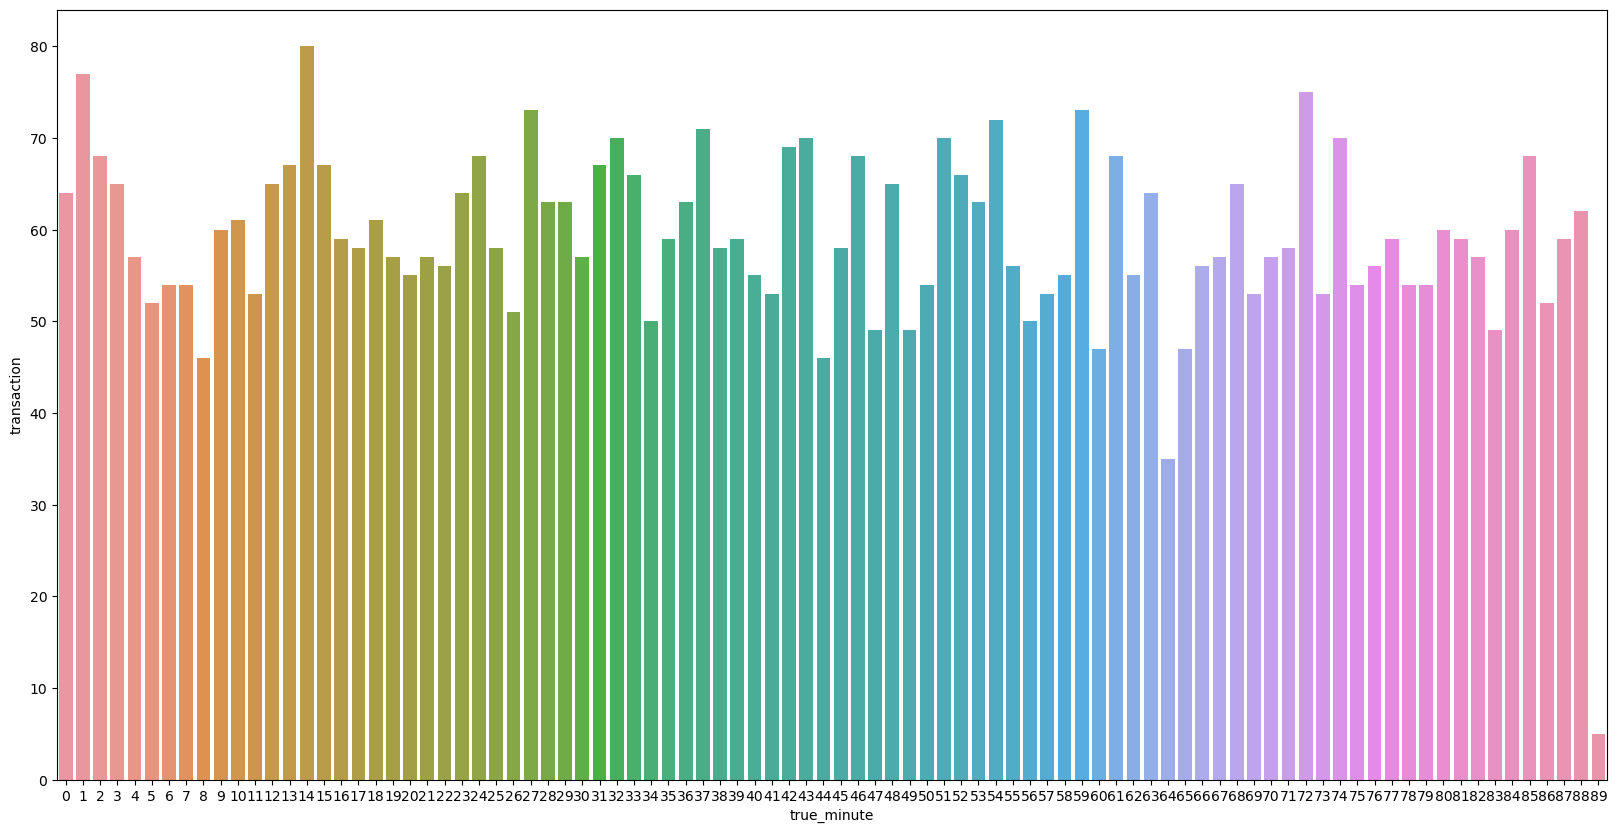

In [31]:
user_vs_minute_pivot_2 = df.groupby('true_minute', as_index=False)\
                        .agg({'transaction' : 'count'})\

plt.figure(figsize=(20,10))
sns.barplot(data=user_vs_minute_pivot_2,x='true_minute', y='transaction')
